### Projeção Estereográfica: ###

Para a exibição de direções de magnetização é conveniente mostrar a informação tridimensional **declinação (D)** e **inclinação (I)** em um gráfico bidimensional (X,Y), ou seja, devemos transferir pontos distribuídos na superfície de uma esfera para um plano. 

Duas projeções comumente usadas são as projeções estereográficas de ângulo e de área igual. 

Veja o esquema abaixo para visualizar quem são as coordenadas **Xeq e Yeq** que precisamos encontrar para construir uma projeção estereográfica.

Perceba que diferentemente das coordenadas geográficas, na projeção Equal Area o eixo **Xeq** aponta para **Leste (E)**.

*(Em coordenadas geográficas X é a direção Norte)*


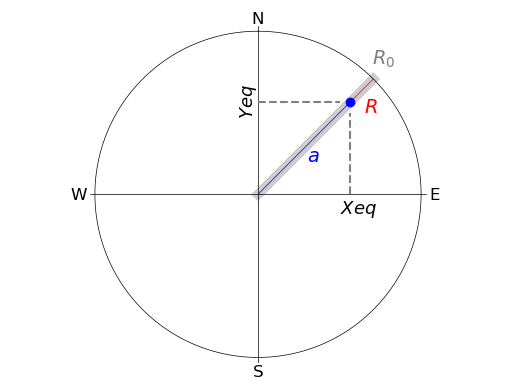

In [4]:
# Rode a ultima célula antes desta

FiguraEsquematica()

De acordo com Collinson, determinanos $R$ da projeção acima para uma projeção de áreas iguais a partir de:

$R = R_0[1 - \sqrt{(1-\sin{I})}]$

Vou definir:

$a = \sqrt{(1-\sin{I})}$

Como vou escolher um gráfico onde o círculo desenhado tem raio 1, então:

$R_0 = 1$

e

$R = 1 - a$

As coordenadas X, Y e Z (coordenadas geográficas: X(norte), Y(Leste), Z(para baixo)) para o vetor unitário são $X_U$, $Y_U$, $Z_U$. Onde: 

$X_U = \cos{D}\cos{I}$

$Y_U = \sin{D}\cos{I}$

$Z_U = \sin{I}$

Onde $D$ é o ângulo de declinacão positivo no sentido horário a partir da direcão Norte e $I$ é o ângulo de inclinacão que o vetor faz com a horizontal, sendo positivo para baixo.

Então, temos que:

$X_{eq} = Y_U \frac{a}{\cos{I}} = Y_U.b $

$Y_{eq} = X_U\frac{a}{\cos{I}} = X_U.b$

onde $b$ é:

$b =\frac{a}{\cos{I}}  = \frac{\sqrt{1-|Z_U|}}{\sqrt{X_U^2 + Y_U^2}}$

*(Verfique que no pacote Eqarea_utils_2024.py tem uma função que calcula $X_{eq} = Y_U.b $ e $Y_{eq} = X_U.b$ chamada **xyz2xyeq(XYZ)** "XYZ to XYeq")*





### Como utilizar as funções ###


O arquivo Eqarea_utils_2024.py deve estar no mesmo diretório ou no seu PYTHONPATH.
 


In [2]:
#Você deve importar o numpy, o pacote Eqarea_utils_2024 e qualquer outro pacote que necessitar.


import numpy as np
import DB_Eqarea_utils_2024 as dbeq



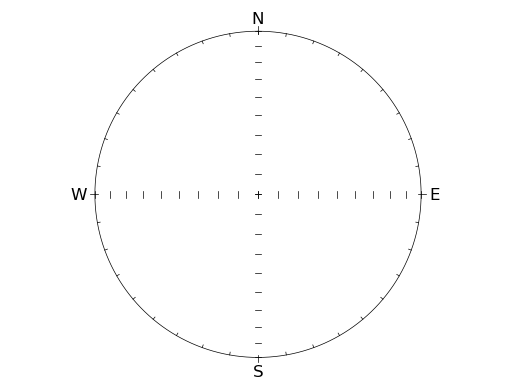

In [3]:
#Criei uma projeção padrão, mas com acesso a outras funções como dbeq.borda_proj, dbeq.centro , dbeq.marcadores_dec, etc você consegue alterar

dbeq.proj_padrao()

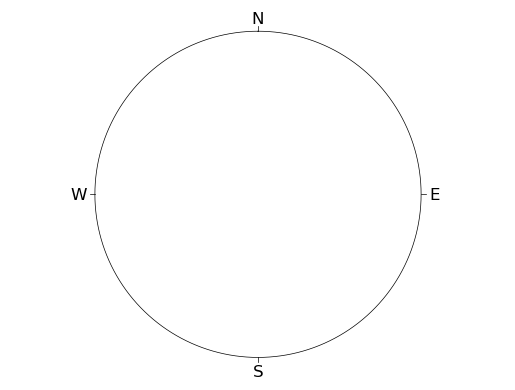

In [4]:
dbeq.borda_proj()

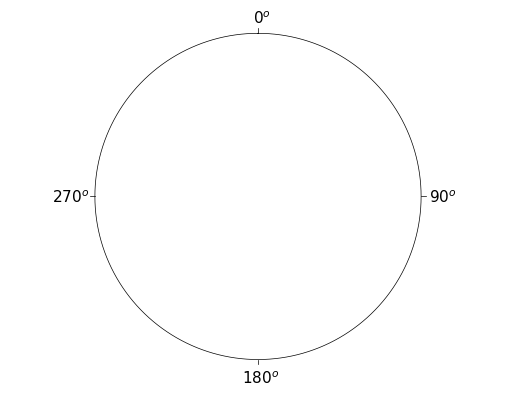

In [5]:
dbeq.borda_proj_num()

In [4]:
# Dados de declinacao e inclinacao para teste 
n=50 

dec = np.linspace(0,360,n) #inventei um vetor com n dados de declinação espaçados igualmente

inc = np.linspace(-90,90,n)#inventei um vetor com n dados de inclinação espaçados igualmente

DI = np.zeros([len(dec),2]) #intentei uma matriz de duas colunas e n linhas

DI[:,0]=dec # coloquei as declinações na primeira coluna
DI[:,1]=inc # coloquei as inclinações na segunda coluna


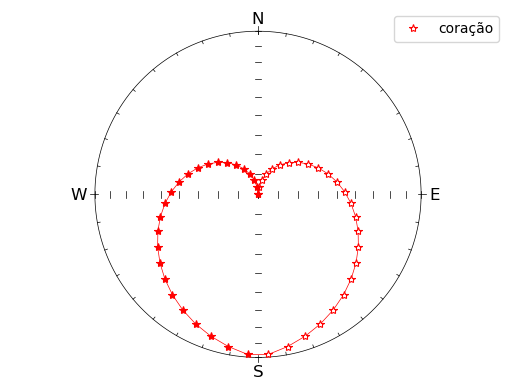

In [5]:
# vamos plotar usando a funcão plot_dados:

dbeq.plot_dados(DI,nome='coração',cormarcador='r',cordalinha='r',legenda=True, marker='*',projecaopadrao=True) 


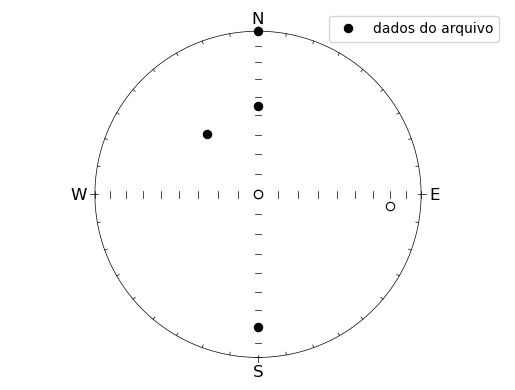

In [6]:
# vamos plotar um conjunto de dados utilizando um arquivo do tipo .txt de dados

DI2 = np.loadtxt("DI.txt")
dbeq.plot_dados(DI2,nome='dados do arquivo',conectados=False) 


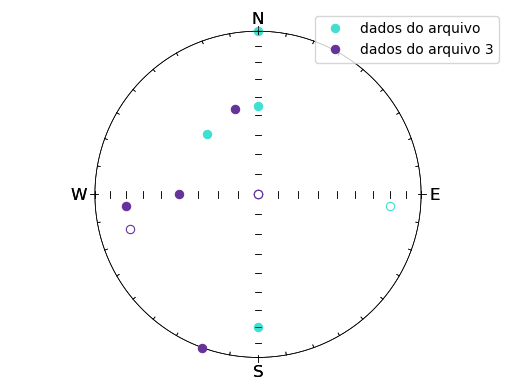

In [7]:
# plotando dois conjuntos de dados
DI2 = np.loadtxt("DI.txt")
DI3 = np.loadtxt("DI3.txt")
dbeq.plot_dados(DI2,nome='dados do arquivo',conectados=False, cormarcador='turquoise') 
dbeq.plot_dados(DI3,nome='dados do arquivo 3',conectados=False,cormarcador='rebeccapurple') 

# Como a projeção está dentro da função plotar, no ponto azul [0,0] vemos que a projeção passa por cima.


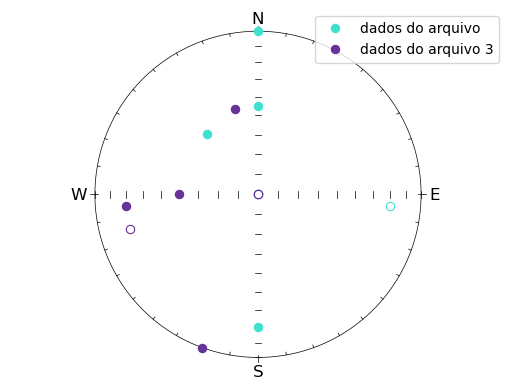

In [8]:
# Para mmudar isso, tiramos a projeção da função na segunda vez que plotamos

dbeq.plot_dados(DI2,nome='dados do arquivo',conectados=False, cormarcador='turquoise') 
dbeq.plot_dados(DI3,nome='dados do arquivo 3',conectados=False,cormarcador='rebeccapurple', projecaopadrao=False) # AQUI!!!

Agora vamos plotar conectado.

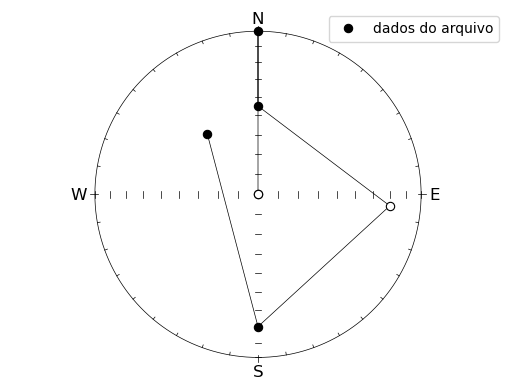

In [9]:
dbeq.plot_dados(DI2,nome='dados do arquivo',conectados=True) 

Observe que a linha que liga os pontos está ruim. 

Precisamos ligar os pontos com curvas (círculos máximos). Parei aqui!

In [3]:
#Gráfico para montar a figura de visualização (primeira figura que aparece neste arquivo)

def FiguraEsquematica():
    import matplotlib.pyplot as plt
    import numpy as np
    import DB_Eqarea_utils_2024 as dbeq
    plt.figure()

    plt.plot([0,np.sqrt(2)/2],[0,np.sqrt(2)/2],c='0.8',lw=7)
    plt.plot([0.8*np.sqrt(2)/2, np.sqrt(2)/2],[0.8*np.sqrt(2)/2,np.sqrt(2)/2],c='r',lw=0.5)
    plt.plot([0,0.8*np.sqrt(2)/2],[0, 0.8*np.sqrt(2)/2],c='b',lw=0.5)
    dbeq.borda_proj()
    plt.hlines(0,xmin=-1,xmax=1, color='k',lw=0.5)
    plt.vlines(0,ymin=-1,ymax=1, color='k',lw=0.5)
    plt.text(0.7,0.8,"$R_0$", fontsize=14,c='0.5')
    plt.text(0.65,0.5,"$R$", fontsize=14,c='r')
    plt.text(0.3,0.2,"$a$", fontsize=14,c='b')
    plt.text(0.5,-0.12,"$Xeq$", fontsize=13, c='k')
    plt.text(-0.12,0.5,"$Yeq$", fontsize=13,c='k', rotation = 'vertical')
    plt.plot([0,0.5],[0.8*np.sqrt(2)/2,0.8*np.sqrt(2)/2],ls='--',c='0.5')
    plt.plot([.8*np.sqrt(2)/2,.8*np.sqrt(2)/2],[0,0.5],ls='--',c='0.5')
    plt.plot([0.8*np.sqrt(2)/2],[0.8*np.sqrt(2)/2],'o',c='b')

    plt.savefig('eqarea.png')
    plt.show()